# Loading Model

In [1]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('AnnaWegmann/Style-Embedding')

## Embedding Sentences 

In [2]:
from sentence_transformers import util
text1 = "r u a fan of them or something?"
text2 = "Are you one of their fans?"
text3 = "Oh yea and that young dr got bad hair"
text4 = "Oh yea and that young dr got bad hair."
text5 = "You do not have the formal perspective"

emb1 = model.encode(text1)  # more informal
emb2 = model.encode(text2)  # more formal, similar content to emb1
print("Cosine-Similarity:", util.cos_sim(emb1, emb2))
emb3 = model.encode(text3)  # more informal, different content to emb1
print("Cosine-Similarity:", util.cos_sim(emb1, emb3))
emb4 = model.encode(text4)  # more informal, different content to emb1
print("Cosine-Similarity:", util.cos_sim(emb1, emb4))
emb5 = model.encode(text5)  # more informal, different content to emb1
print("Cosine-Similarity:", util.cos_sim(emb1, emb5))

Cosine-Similarity: tensor([[0.0777]])
Cosine-Similarity: tensor([[0.7861]])
Cosine-Similarity: tensor([[0.6347]])
Cosine-Similarity: tensor([[0.2798]])


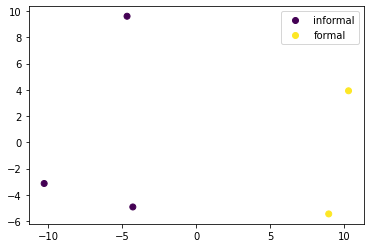

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
X = [emb1, emb2, emb3, emb4, emb5]
y = [1, 2, 1, 1, 2]
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=["informal", "formal", "informal", "informal", "formal"])
plt.show()

## Comparing the Styles of Conversation Partners

In [13]:
from convokit import Corpus, download
corpus = Corpus(filename=download("conversations-gone-awry-corpus"))

Dataset already exists at /home/anna/.convokit/downloads/conversations-gone-awry-corpus


In [26]:
corpus.random_conversation().print_conversation_structure(lambda x: f"{x.id}: {x.text}" if x.get_conversation().meta["conversation_has_personal_attack"] else "")

445132896.1407.1387: ==Deletion review for [WIKI_LINK: Template:ISO 15924]==

    445132896.1428.1387: An editor has asked for a wiki_link of wiki_link. Because you closed the deletion discussion for this page, speedily deleted it, or otherwise were interested in the page, you might want to participate in the deletion review.  (Set of four). 
        445136152.1545.1545: Now replied. 
    445235369.1827.1827: You've had thirteen hours to fix the mess you've made. I've asked for help at wiki_link because this is unacceptable. You've found abundant time to justify your actions, but done bubkes to fix the problems you caused. wiki_link 
        445236032.1935.1935: It's currently night in Ironholds's part of the world; I would assume he's sleeping at the moment, and probably has been for some time. Perhaps you could hold off on being upset that he hasn't answered? 
            445237741.2020.2020: Vanisaac, I appreciate your additions to the current discussion, but it is not Ironholds any

In [28]:
import random
random.seed(42)
nbr_att = 0
nbr_natt = 0
first_sim_score_att = 0
first_sim_score_natt = 0

for i, conv in enumerate(corpus.iter_conversations(lambda x: len(x.get_speaker_ids()) == 2 and x.meta['verified'])):
#     if i > 1000:
#         break
    has_attack = conv.meta['conversation_has_personal_attack']    
    utts = conv.get_chronological_utterance_list()
    sim_score = util.cos_sim(model.encode(utts[0].text), model.encode(utts[1].text))
    if has_attack:
        nbr_att += 1
        first_sim_score_att += sim_score
    else:
        nbr_natt += 1
        first_sim_score_natt += sim_score
    if sim_score > 0 and random.random() < 0.04:
        print(f"The two texts have an attack {has_attack} with sim value {sim_score}")
        print(f"\t text 1: \t {utts[0].text[:200]}")
        print(f"\t text 2: \t {utts[1].text[:200]}")
        print("\n")
        
print(f"Mean style sim score attack: {first_sim_score_att/nbr_att}")
print(f"Mean style sim score not attack: {first_sim_score_natt/nbr_natt}")

The two texts have an attack True with sim value tensor([[0.9316]])
	 text 1: 	 No more than two editors advocated deletion.  Greatestrowerever and maybe Kymacpherson.  That's not a clear consensus for deletion.  Cheers, 
	 text 2: 	 In the future please don't close Afds when you don't have the courtesy of reading the comments.  All comments favored deletion except two.  Please don't be so careless in the future. 


The two texts have an attack False with sim value tensor([[0.4817]])
	 text 1: 	 Please do not remove sources from articles. Sources don't expire; things like participants in an episode must be sourced. A statement of "confirmed on air" is not a source. Please read wiki_link and w
	 text 2: 	 Not if the episode already aired. Then references are no longer necessary. It's been that way for years on these SNL season pages. - 


The two texts have an attack True with sim value tensor([[0.3025]])
	 text 1: 	 Ok now I gotta explain it to you as well. I originally created "Who is